Christopher Thornburg \\
DSA 501 \\
Title: W4T2 Buffalo Open Data 311

# Instructions:  
Create a Colab notebook BOD311_lastname.ipynb where you download and analyze the data from Buffalo Open Data 311
# Submit:  
Colab notebook BDO311_lastname.ipynb

https://data.buffalony.gov/Quality-of-Life/311-Service-Requests/whkc-e5vr

Here we import the csv from the above U.R.L. and use pandas to read the csv file. Then we peek at the information, and see what stands out.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('311_Service_Requests.csv')
data.describe()
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Case Reference           2680 non-null   object 
 1   Open Date                2680 non-null   object 
 2   Closed Date              2563 non-null   object 
 3   Status                   2680 non-null   object 
 4   Subject                  2680 non-null   object 
 5   Reason                   2680 non-null   object 
 6   Type                     2680 non-null   object 
 7   Object Type              2680 non-null   object 
 8   Address Number           2561 non-null   object 
 9   Address Line 1           2667 non-null   object 
 10  Address Line 2           275 non-null    object 
 11  City                     2680 non-null   object 
 12  State                    2680 non-null   object 
 13  Zipcode                  2680 non-null   object 
 14  Property ID             

Convert date to DateTime for analysis. Project engineer service duration to look at open / close dates. Group categorical values together, for visual reasons.

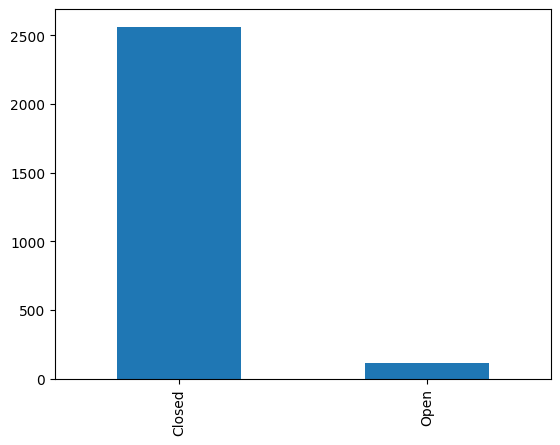

In [ ]:
data['Open Date'] = pd.to_datetime(data['Open Date'])
data['Closed Date'] = pd.to_datetime(data['Closed Date'])

data['Service Duration'] = (data['Closed Date'] - data['Open Date']).dt.days

# Count of different statuses
status_counts = data['Status'].value_counts()

# Count of different Subjects
subject_counts = data['Subject'].value_counts()

# You can visualize these counts using bar plots
status_counts.plot(kind='bar')
plt.show()

The data has longitude and latitude, but this information seems to need a geographic backdrop.

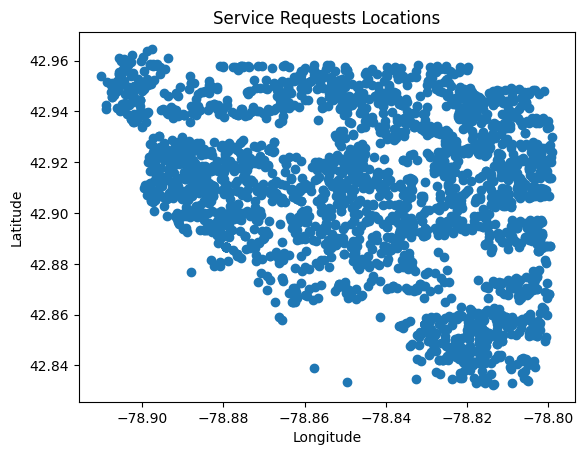

In [ ]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Service Requests Locations')
plt.show()

There is a recent new trend in requests.

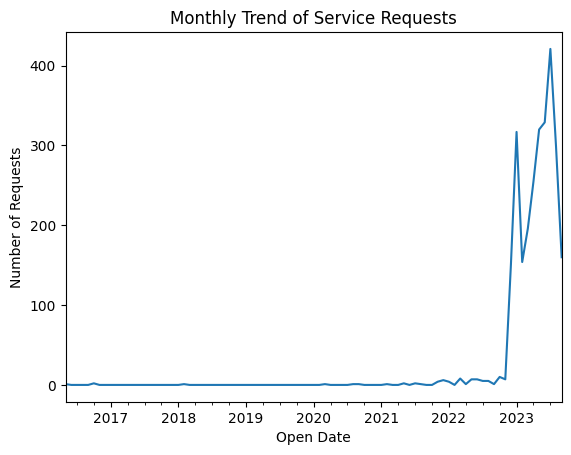

In [ ]:
data.set_index('Open Date', inplace=True)
data.resample('M').size().plot()
plt.title('Monthly Trend of Service Requests')
plt.ylabel('Number of Requests')
plt.show()

In [ ]:
missing_data = data.isnull().sum()
missing_data_percent = (data.isnull().sum() / len(data)) * 100
missing_info = pd.DataFrame({'missing_count': missing_data, 'missing_percent': missing_data_percent})
print(missing_info)

                         missing_count  missing_percent
Case Reference                       0         0.000000
Closed Date                        117         4.365672
Status                               0         0.000000
Subject                              0         0.000000
Reason                               0         0.000000
Type                                 0         0.000000
Object Type                          0         0.000000
Address Number                     119         4.440299
Address Line 1                      13         0.485075
Address Line 2                    2405        89.738806
City                                 0         0.000000
State                                0         0.000000
Zipcode                              0         0.000000
Property ID                        118         4.402985
Location                            91         3.395522
Latitude                            91         3.395522
Longitude                           91         3

Deciding whether the Reason for service requests has any correlation with Service Duration

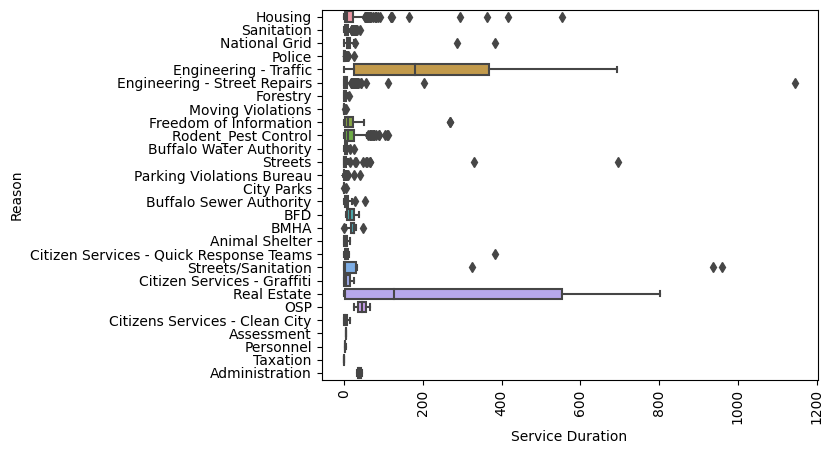

In [ ]:
sns.boxplot(x='Service Duration', y='Reason', data=data)
plt.xticks(rotation=90)
plt.show()